# **Course Analysis**

This dataset is scrapped data from Coursera official web site and the data base is publicly available in Kaggle. 
The project aims to help any new learner get the right course to learn by just answering a few questions.

**Note:** *This analysis contains interactive visualizations created with Plotly. These charts are fully interactive in Jupyter Notebook but may not display properly when viewed on GitHub. For the best experience with the visualizations, please view this notebook in Jupyter or download it to run locally.*

## **1. Data review and cleaning**

#### **1.1 Import of libraries and loading data**  

For analysis mainly Pandas, Numpy and Plotly will be used.

seaborn and matplotlib were used for for outliers overview, scipy for correlation review. 

Data was downloaded from Kaggle, the file name is coursea_data.csv. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy

df = pd.read_csv("coursea_data.csv")
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


#### **1.2 Overview of Column Names and Data Types**
The info() method is used to have a summary of a DataFrame. 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


We can see that there are **7 columns and 891 entries**. 

**No null values are present** in the dataset since non null count shows the same number as entries in the data frame. 

**Two numerical columns can be seen**: "Unnamed: 0 " which will be dropped and "course_rating". 

**"course_students_enrolled"** has a type object, however it should be also numerical. From the head() we saw that it is an object due to values contain shorthand notations "k" and "m". Hence it **should be converted to numerical.**

In [49]:
df = df.drop(columns=['Unnamed: 0'])
df['course_students_enrolled'] = df['course_students_enrolled'].replace(
    {'k': '*1e3', 'm': '*1e6'}, regex=True
    ).map(pd.eval).astype(int)  
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


#### **1.3 Check for Duplicates**

duplicated and sum are used to identify the duplicate values in the data frame. 

In [50]:
df.duplicated().sum()

0

**No duplicated values found** within the dataframe. No cleaning from duplicates is needed. 

#### **1.4 Check for Outliers in Course Students Enrolled**

A boxplot will be used to visualize the distribution of data and detect outliers.

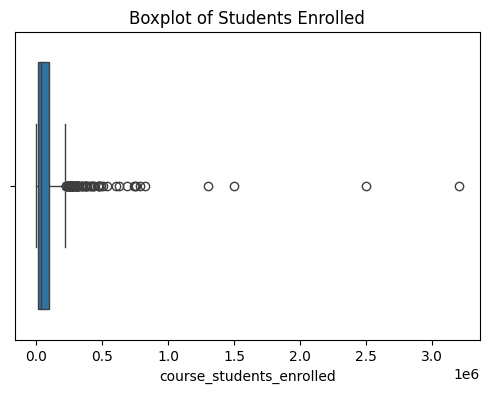

In [51]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["course_students_enrolled"])
plt.title("Boxplot of Students Enrolled")
plt.show()

We can see **many dots above the whiskers**, hence some courses might have an **abnormally high number of students**.

Courses with extremely high enrollments (e.g., millions of students) can distort our analysis. These outliers affect the mean, make visualizations harder to interpret, and might be errors or special cases. By removing them, we ensure a clearer, more representative analysis of typical course enrollments.

**However, the Outliers will not be removed as:** 
- A very popular course (high enrollments) is not an error but an important trend.
- A low-enrollment course might still have high ratings and niche value.
- Removing them would hide insights about what makes courses successful or unpopular.

Outliers can be reviewed: 

In [52]:
Q1 = df["course_students_enrolled"].quantile(0.25)
Q3 = df["course_students_enrolled"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["course_students_enrolled"] < lower_bound) | (df["course_students_enrolled"] > upper_bound)]


outliers

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000
18,Academic English: Writing,"University of California, Irvine",SPECIALIZATION,4.7,Beginner,540000
27,Advanced Data Science with IBM,IBM,SPECIALIZATION,4.4,Advanced,320000
43,An Introduction to Programming the Internet of...,"University of California, Irvine",SPECIALIZATION,4.6,Beginner,270000
...,...,...,...,...,...,...
816,The Singer Songwriter,Berklee College of Music,SPECIALIZATION,4.8,Beginner,320000
850,Using Python to Access Web Data,University of Michigan,COURSE,4.8,Mixed,310000
859,Web Design for Everybody: Basics of Web Develo...,University of Michigan,SPECIALIZATION,4.7,Beginner,280000
864,What is Data Science?,IBM,COURSE,4.7,Beginner,260000


## **2. Exploratory Data Analysis**
The data was cleaned from outliers, there were no duplicates, data types were corrected. Hence analysis of the Courses can be made.      

#### **2.1 Distribution of Course Ratings**

Plotly was used to visualize the distribution of course ratings interactively. 

###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [53]:
fig = px.histogram(df, x="course_rating", nbins=10, title="Distribution of Course Ratings")
fig.update_layout(xaxis_title="Course Rating", yaxis_title="Number of Courses")
fig.show()

The majority of the **course ratings** are from **4.6 to 4.7**, 419 courses are ranked this way.

#### **2.2 Correlation between course rating and student involvement**
Spearman correlation was used, since it measures the monotonic relationship (whether variables increase/decrease together, but not necessarily linearly). To see if the course rating depends on the number of enrollments.

In [54]:
spearman_corr = df['course_students_enrolled'].corr(df['course_rating'], method='spearman')
print(f"Correlation between students enrolled and course_rating: {spearman_corr}")

Correlation between students enrolled and course_rating: 0.026831305499584096


**Correlation is close to 0**, there is no significant relationship between the two variables.

#### **2.3 Number of Courses by Difficulty Level**

Plotly was used to visualize the course dificulty by their numbers interactively. 

df_count was created to show the number of cources and sort_values to display from highest to lowest. 

###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [55]:
df_count = df.groupby('course_difficulty').size().reset_index(name='count')

df_count = df_count.sort_values(by='count', ascending=False)

fig = px.bar(df_count, x="course_difficulty", y="count", 
             title="Course Numbers by Difficulty", 
             labels={"course_difficulty": "Difficulty Level", "count": "Number of Courses"})
fig.show()


The **biggest variety** of courses are for **beginners**, reaching 487 total courses.  

The **smallest variety** of courses is for **advanced users**, only 19 cources can be seen.

#### **2.4 Enrollments by Difficulty Level**

Plotly was used to visualize the course dificulty by their enrollments interactively. 

df_count was created to show the enrollments numbers and sort_values to display from highest to lowest. 

###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [56]:
df_count = df.groupby('course_difficulty')['course_students_enrolled'].sum().reset_index(name='total_enrollments')
df_count = df_count.sort_values(by='total_enrollments', ascending=False)


fig = px.bar(df_count, x="course_difficulty", y="total_enrollments", 
             title="Total Student Enrollments by Difficulty Level", 
             labels={"course_difficulty": "Difficulty Level", "total_enrollments": "Total Enrollments"})
fig.show()


The **courses for beginners are most popular** as 39.9218M users are enrolled to Beginner courses.  

**Advanced courses are least popular**, having only 1.2644m enrolments. 

#### **2.5 Best rated course organizations by Difficulty Level**

Group and Aggregate was used from Pandas library, to group the data by both course_difficulty and course_organization, calculate the average course rating (mean) and the total number of students enrolled (sum) for each combination.

transform(max) is used to identify the maximum average rating for each course_difficulty and filters to show only organizations whose average rating equals the maximum rating.

Plotly was used to create a heatmap visualization of the best rated course organizations. 


###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [57]:

rating_by_difficulty_org = df.groupby(['course_difficulty', 'course_organization']).agg(
    average_rating=('course_rating', 'mean'),
    total_enrollment=('course_students_enrolled', 'sum')
).reset_index()

max_ratings = rating_by_difficulty_org.groupby('course_difficulty')['average_rating'].transform(max)

top_rated_orgs = rating_by_difficulty_org[rating_by_difficulty_org['average_rating'] == max_ratings]

top_rated_orgs


,course_difficulty,course_organization,average_rating,total_enrollment
1,Advanced,Duke University,4.9,170000
27,Beginner,Crece con Google,4.9,8800
52,Beginner,London Business School,4.9,57000
77,Beginner,ScrumTrek,4.9,12000
87,Beginner,The University of Chicago,4.9,130000
115,Beginner,University of Florida,4.9,13000
182,Intermediate,Universidade Estadual de Campinas,4.9,17000
187,Intermediate,University of Amsterdam,4.9,3900
209,Mixed,Arizona State University,4.9,81000
222,Mixed,Google - Spectrum Sharing,4.9,210000


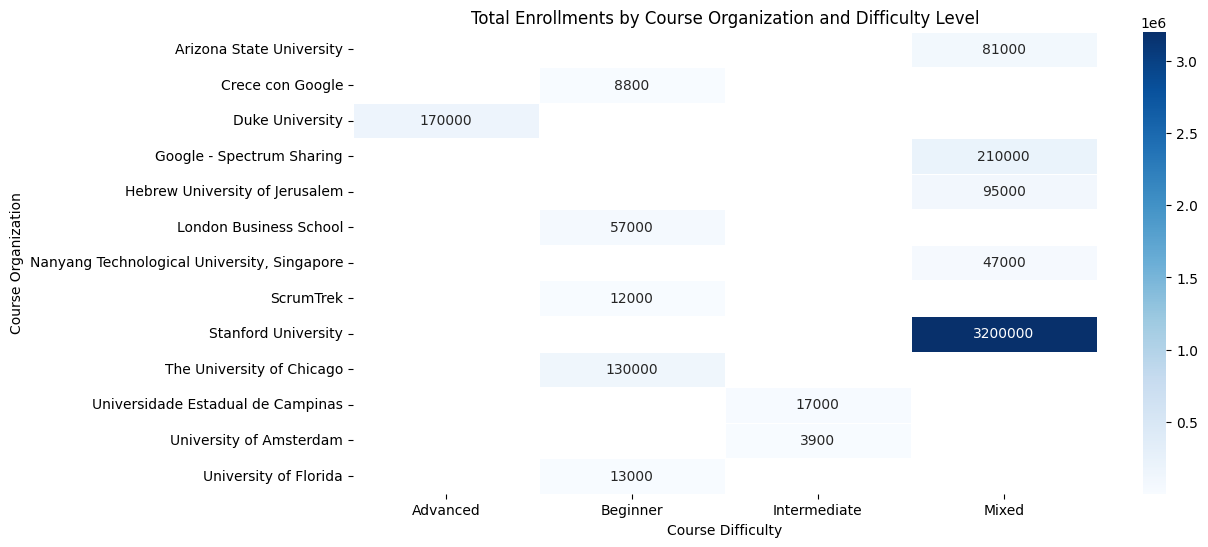

In [58]:
heatmap_data = top_rated_orgs.pivot(index="course_organization", columns="course_difficulty", values="total_enrollment")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Total Enrollments by Course Organization and Difficulty Level")
plt.xlabel("Course Difficulty")
plt.ylabel("Course Organization")

plt.show()

The courses for **beginners** have 5 courses providers who have highest courses average ratings, the most popular is **The University of Chicago** who has the biggest **enrolment number** of all highest rated courses for beginners. 

The **most popular** of all course providers with highest rating is **Stanford University** designed for **mixed difficulty** users.  

Only **one** course provider has the highest rating for advanced users and it is **Duke University**.


#### **2.6 Top 10 most popular specialization cources with rating above average**

Average of all courses was counted to represent the quality of the course higher than average and filtered by specialization courses. 

Plotly was used to visualize the course dificulty by their enrollments interactively. 


###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [59]:
avg_course_rating = df['course_rating'].mean()

top_spec_courses = df[(df['course_rating'] > (avg_course_rating)) & (df['course_Certificate_type'] == 'SPECIALIZATION')]


spec_course_popularity = top_spec_courses.groupby('course_title')['course_students_enrolled'].sum().reset_index()
top_10_spec_courses = spec_course_popularity.sort_values('course_students_enrolled', ascending=False).head(10)

filtered_top_courses = top_spec_courses[top_spec_courses['course_title'].isin(top_10_spec_courses['course_title'])]


fig = px.scatter(
    filtered_top_courses, 
    x='course_students_enrolled', 
    y='course_title', 
    color='course_organization',
    color_continuous_scale='Viridis', 
    size='course_students_enrolled',
    hover_name='course_title', 
    hover_data={'course_difficulty': True, 'course_rating': True, 'course_students_enrolled': True},
    title="Top 10 most popular specialization cources with rating above the average",
    labels={
        "course_organization": "Course Organization", 
        "course_title": "Course Title", 
        "course_rating": "Course Rating", 
        "course_students_enrolled": "Number of Enrollments", 
        "course_difficulty": "Course Difficulty"
    },
    size_max=20 
)

fig.show()


The most popular specialization course is **"Python for Everybody" organized by University of Michigan** with rating 4.8 rating.  

Second most popular is **"Deep Learning" organized by deeplearning.ai** with rating 4.8.

Third is **"Improve Your English Communication Skills" organized by Georgia Institute of Technology** with rating 4.7 rating.

#### **2.7 Top 3 most popular professional certificate cources with rating above average**

Average of all courses was counted to represent the quality of the course higher than average and filtered by professional certificate. 

Plotly was used to visualize the course dificulty by their enrollments interactively. 


###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [60]:
top_prof_courses = df[(df['course_rating'] > (avg_course_rating)) & (df['course_Certificate_type'] == 'PROFESSIONAL CERTIFICATE')]

prof_course_popularity = top_prof_courses.groupby('course_title')['course_students_enrolled'].sum().reset_index()
top_3_prof_courses = prof_course_popularity.sort_values('course_students_enrolled', ascending=False).head(10)

filtered_top_prof_courses = top_prof_courses[top_prof_courses['course_title'].isin(top_3_prof_courses['course_title'])]


fig = px.scatter(
    filtered_top_prof_courses, 
    x='course_students_enrolled', 
    y='course_title', 
    color='course_organization',
    color_continuous_scale='Viridis', 
    size='course_students_enrolled',
    hover_name='course_title', 
    hover_data={'course_difficulty': True, 'course_rating': True, 'course_students_enrolled': True},
    title="Top 3 most popular professional certificate cources with rating above the average",
    labels={
        "course_organization": "Course Organization", 
        "course_title": "Course Title", 
        "course_rating": "Course Rating", 
        "course_students_enrolled": "Number of Enrollments", 
        "course_difficulty": "Course Difficulty"
    },
    size_max=20 
)

fig.show()

**"SAS Programmer" by SAS** is the most popular professional certificate course. 

**"Google IT Support" by Google** is the second most popular professional certificate course.

**"Cloud Engineering with Google Cloud" by Google**  is the third most rated and popular course.  

#### **2.8 Top 10 most popular course certificate with higest ratings**

Max and -0.1 rating of all courses was counted to represent the quality of the course higher than average and filtered by type as course.


Plotly was used to visualize the course dificulty by their enrollments interactively. 


###### **Please know, that exact counts and zoom is only available in Jupiter notebook*

In [61]:
max_course_rating = df['course_rating'].max()

top_courses = df[(df['course_rating'] == (max_course_rating-0.1)) & (df['course_Certificate_type'] == 'COURSE')]

course_popularity = top_courses.groupby('course_title')['course_students_enrolled'].sum().reset_index()
top_10_courses = course_popularity.sort_values('course_students_enrolled', ascending=False).head(10)

filtered_top_courses = top_courses[top_courses['course_title'].isin(top_10_courses['course_title'])]


fig = px.scatter(
    filtered_top_courses, 
    x='course_students_enrolled', 
    y='course_title', 
    color='course_organization',
    color_continuous_scale='Viridis', 
    size='course_students_enrolled',
    hover_name='course_title', 
    hover_data={'course_difficulty': True, 'course_rating': True, 'course_students_enrolled': True},
    title="Top 10 most popular professional certificate cources with rating above the average",
    labels={
        "course_organization": "Course Organization", 
        "course_title": "Course Title", 
        "course_rating": "Course Rating", 
        "course_students_enrolled": "Number of Enrollments", 
        "course_difficulty": "Course Difficulty"
    },
    size_max=20 
)

fig.show()

Most popular course is **"Machine Learning" by Stanford University**. 

Second most popular course is **"The Science of Well-Being"" by	Yale University**. 

Third most popular course is **"Neural Networks and Deep Learning" by deeplearning.ai**.

## **3. Conclusion**

The analysis of Coursera course data provides valuable insights for both learners seeking the right educational opportunities and course creators aiming to optimize their offerings.

Key findings from our analysis include:

1. **Rating Distribution**: The majority of courses on the platform are highly rated, with most courses falling in the 4.6-4.7 range (419 courses). This suggests overall high quality of content across the platform.

2. **Difficulty Level Insights**:
   - Beginner courses dominate the platform with 487 different offerings and attract the most students with nearly 40 million enrollments.
   - Advanced courses are significantly underrepresented with only 19 courses and 1.26 million enrollments.
   - This suggests a clear market preference for entry-level content and potentially an opportunity gap for high-quality advanced courses.

3. **Institutional Excellence**:
   - For beginners, The University of Chicago stands out with the highest-rated courses and substantial enrollment numbers.
   - Stanford University excels in mixed-difficulty courses, attracting the largest number of students among top-rated providers.
   - Duke University uniquely dominates the advanced course category with the highest ratings.

4. **Popular Specializations**:
   - "Python for Everybody" by University of Michigan leads as the most popular specialization with a 4.8 rating.
   - "Deep Learning" by deeplearning.ai follows closely as the second most popular specialization, also with a 4.8 rating.
   - "Improve Your English Communication Skills" by Georgia Institute of Technology rounds out the top three with a 4.7 rating.

5. **Professional Certificates**:
   - "SAS Programmer" by SAS emerged as the most popular professional certificate.
   - "Google IT Support" by Google follows as the second most popular professional certificate.
   - "Cloud Engineering with Google Cloud" by Google ranks third in popularity among professional certificates.

6. **Top Courses**:
   - "Machine Learning" by Stanford University leads in popularity among top-rated individual courses.
   - "The Science of Well-Being" by Yale University follows as the second most popular high-rated course.
   - "Neural Networks and Deep Learning" by deeplearning.ai ranks third in popularity among top-rated courses.

These findings suggest that while beginners are well-served by the current course offerings, there is significant room for growth in intermediate and advanced content. Educational institutions looking to expand their online presence might consider focusing on these underserved difficulty levels. For learners, the analysis provides clear direction on which courses and institutions consistently deliver high-quality content across different domains and difficulty levels.

## **4. Suggestions for Improvement**

The current analysis provides valuable insights, but several improvements could enhance its depth and utility:

1. **Time-Based Analysis**:
   - Data by year could show the track of enrollment trends over time
   - Would enable analysis of how course ratings evolve after launch
   - Possible identification of seasonal patterns in enrollment that could guide course release timing

2. **Completion rate**:
   - The course completetion rate would show the cource dificulty level and overall its quality 
   - Course duration data would show the relationship between length and popularity
   - Would show how the rate of the course changes based on its length
   
3. **Pricing and financial**: 
   - Would show how the price impacts popularity
   - Additional information would allow to see relations between price and rating 
   - Would allow better understanding of investments in studies 

4. **Visualization Enhancements**:
   - Creation of interactive dashboards would allow users to filter and explore data based on their interests
   - Course recommendation tool based on user needs and interest fields
   
Implementing these suggestions would transform the current descriptive analysis into a more comprehensive, actionable resource that could benefit both learners choosing their educational path and course creators designing new offerings.